In [1]:
import networkx as nx
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from IPython.display import Image
from operator import mul

# Assignment APMLA-WS 2021-22: 

## Belief Propagation for random matching problem

 Matching is another classical problem of graph theory. It is related to a dimer problem in statistical physics. Given a  (unweighted,
  undirected) graph $G(V,E)$ a matching $M \subseteq E$ is defined as a subset of edges such that if $(ij) \in M$ then
    no other edge that contains node $i$ or $j$ can be in $M$. In other words a matching is a subset of edges such that no two edges of the
    set share a node. 

 Fill up this _jupyter_ notebook with the skeleton of a code to solve this assignment. 

### Point a)
Write a probability distribution that is uniform over all
    matchings on a given graph. _Hint_: consider binary random variables $\sigma_{ij}$ on the network edges.

### Point b)
Write a probability distribution that that gives a larger weight to larger matchings, where the
    size of a matching is simply $|M|$. _Hint_: you need to write $|M|$ as a function of $|E|$ and $\sum_{(ij)\in E}\sigma_{ij}$ for $\sigma_{ij}\in M$.

### Point c)
Draw a factor graph corresponding to it for the example of a graph with 6 nodes and edges $E=\left\{(1,2),(1,3),(2,3),(1,4),(2,5), (3,6)\right\}$. You can add it to the notebook as a figure or using latex package _tikz_.

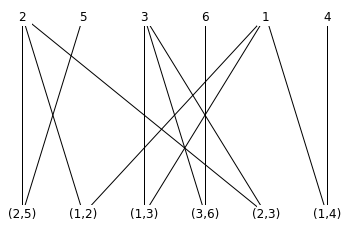

In [2]:
#Image("./path.png")
function_params = {}
functions = [
    "1", "2", "3", "4", "5", "6"
]
variable_params = {}
variables = ["(1,2)", "(1,3)", "(2,3)", "(1,4)", "(2,5)", "(3,6)"]
edges = [
    ("(1,2)", "1"),
    ("(1,2)", "2"),
    ("(1,3)", "1"),
    ("(1,3)", "3"),
    ("(2,3)", "2"),
    ("(2,3)", "3"),
    ("(1,4)", "1"),
    ("(1,4)", "4"),
    ("(2,5)", "2"),
    ("(2,5)", "5"),
    ("(3,6)", "3"),
    ("(3,6)", "6")
    ]

example_graph = nx.Graph()
example_graph.add_nodes_from([(var, variable_params) for var in variables])
example_graph.add_nodes_from([(var, variable_params) for var in functions])
example_graph.add_edges_from(edges)
fig, axs = plt.subplots()
nx.draw(example_graph, ax=axs, node_shape="s", pos=nx.bipartite_layout(example_graph, functions, align="horizontal"), with_labels=True, node_color="white")
plt.show()

# Upper represent function nodes (Nodes), lower variable nodes (edges)


In [12]:
for e in example_graph.edges():
    print(e)
    example_graph.edges()[e]["message_t"] = 1
    # print(example_graph.edges()[e])

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [4]:
# you can look at nodes like this
print(example_graph["1"])
print(example_graph["(1,2)"])
# you can also look at the edges like this
print(example_graph["1"]["(1,2)"])

{'(1,2)': {'message_t': 1}, '(1,3)': {'message_t': 1}, '(1,4)': {'message_t': 1}}
{'1': {'message_t': 1}, '2': {'message_t': 1}}
{'message_t': 1}


### Point d)
Using BP to model marginals of the matching assignment, denote as:
 * $\nu_{\sigma_{ij}}^{(ij) \to i} $ the messages from _variable_ node $(ij)$ to _function_ node $i$.
 * $  \hat{\nu}_{\sigma_{ij}}^{i \to (ij)}$ the message from _function_ node $i$ to  _variable_ node $(ij)$.  
 
Note that they are both functions of the state $\sigma_{ij}$ of variable node $(ij)$.  
	_Hint_: here variable nodes (circles) correspond to an edge $e=(i,j) \in E$ and factor nodes (squares) correspond to nodes $i \in V$ in the \textit{original} network $G(V,E)$.  
* Write BP equations for this model.   
_Hint_: write an explicit derivation for _each of the two possible_ values of $\sigma_{ij}$.
	Notice that we are implementing _hard_ constraints. This means that for each value of $\sigma_{ij}$, there can be only a limited number of _allowed_ configurations of $\left\{\sigma_{ik}\right\}$, for $k \in \partial i \setminus j$. In principle there should be $\sim 2^{k_{i}-1}$ of them, but in practice, many are not allowed once $\sigma_{ij}$ is fixed; we remain with ${k_{i}}$ allowed configurations (for one of the two values of $\sigma_{ij}$) and only one configuration allowed for the other value of $\sigma_{ij}$. Do _not_ consider the configuration where $(ij) \notin M$ AND $(ik)  \notin M$, $\forall k \in \partial i \setminus j$, for a total of ${k_{i}}-1$ allowed configuration to be considered in the BP implementation.


In [5]:
()

()

### Point e)
Write the equation for the one-point marginal $P(\sigma_{i})$ and the two-point marginal $P(\sigma_{i},\sigma_{j})$ obtained from BP.

## BP Implementation (point f)

### Point i)
Implement the BP equations for Erdos-Renyi graphs of $N=200$ nodes as derived above. 

In [6]:
# Generate graph
N, c = 200, 4  # N is the number of nodes, c is the average degree
G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=29)
# G = G.to_directed() # 

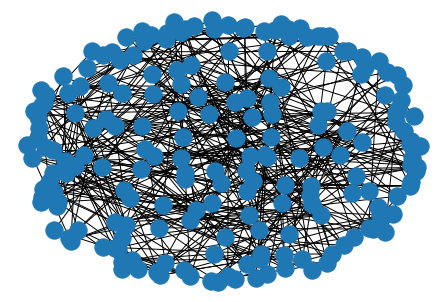

In [7]:
# inspect the graph
pos=nx.spring_layout(G,k=1)
nx.draw(G, pos)

In [9]:
# Checking the convergence
def convergence(message_new, G, abs_tol):# FILL):
    # check how many violations and divide by number of egdes
    # return(err, err < abs_tol)

In [8]:
def compute_fac_to_var_message(G, fac, var):
    # for computation, we assume variable/egde is 0
    message_sum = 0
    neighbour_edges = G.edges(fac).remove(var)
    for active_edge in neighbour_edges: # we just need to iterate over all possible neighbours since just one of them can be one at a time
        zero_edges = neighbour_edges.copy().remove(active_edge)
        product = [egde["message_t"][fac][0] for egde in zero_edges] # get the incoming message to fac for all neighbours beeing 0
        message_sum += reduce(mul, product, 1) * active_edge["message_t"][fac][1] # multiply be incoming for neighbour beeing 1 and add to sum

    return message_sum



In [45]:
def BP(G, init='random', update='random', max_it=1000, abs_tol=1e-4, alpha=0.1, report=False, seed=98): 
    if init == 'random':
        np.random.seed(seed)
        for e in G.edges():
            # for each edge we have two messages, one in each direction
            # for both directions we have bernoulli so we could pass the probability distribution as [p(x=0), p(x=1)]
            p = np.random.rand(4)
            # we have order by connection to factor node and the incoming and outgoing message
            G.edges()[e]['message_t'] = {e[0]: [p[0], p[1]], e[1]: [p[2], p[3]]}# FILL just randomly init each message
    elif init == 'all-negative':
        for e in G.edges():
            G.edges()[e]['message_t'] = -1# dummy FILL init all mesages as believen sigma_ij is 0 
    elif init == 'all-positive':
        for e in G.edges():
            G.edges()[e]['message_t'] = -1# dummy FILL init all messages as believing sigma_ij is 1 
        
    # Iterating
    conv, it = False, 0# FILL
    differences = []
    
    if update=='parallel':
        while not conv: # FILL
            message_new = {}
            for e in G.edges():
                i = e[0]
                j = e[1]
                new_message_t = {}
                # first update incoming messages
                new_message_t[i][0] = -1
                new_message_t[j][0] = -1
                # then update outgoing messages
                new_message_t[i][1] = -1
                new_message_t[j][1] = -1
                # FILL
                # here update both messages as in the equations, however dont save directly since we only should update after timestep   
                # FILL
                    
            diff, conv = convergence(message_new, G, abs_tol)
            differences.append(diff)
            it+=1
            # FILL

    elif update=='random':
        while True:# FILL:
            message_old = {}
            perm = list(G.edges())
            np.random.seed(seed)
            np.random.shuffle(perm)
            for e in perm:
                message_old[e] = # FILL why do we need to fill this??
                i = e[0]
                j = e[1]
                
                # here we directly update instead of first computing all updates and then looking at them

            diff, conv = convergence(message_old, G, abs_tol)
            differences.append(diff)
            it+=1
            seed+=1
    
    if report:
        print('Number of iterations: {0}'.format(it))
    
    return(it, differences)

SyntaxError: invalid syntax (2317827456.py, line 8)

## Point ii) 
Check how the behavior depends on the order of update for the ``random'' initialization, i.e. compare what happens if you update all messages at once or sequentially at random one by one.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Parallel update (all messages at once)
x, y = BP(# FILL)
ax[0].plot(np.arange(x), y)
ax[0].set_title('Parallel update', size=16)
ax[0].set_xlabel('Number of iterations',size=12)
ax[0].set_ylabel('$err$',size=12)

# Random update (one by one)
x, y = BP(# FILL)
ax[1].plot(np.arange(x), y)
ax[1].set_title('Random update', size=16)
ax[1].set_xlabel('Number of iterations', size=12)
ax[1].set_ylabel('$err$',size=12)

plt.show()

As last time, the parallel update needs more iterations for reaching the converge than the random update. 

### Point iii)
  Initialize BP in 3 different ways (recall that they are a function of random variables $\sigma_{ij} \in \left\{0,1\right\}$): 
* ``random'' : each of the two possible values of $\sigma_{ij}$ is selected uniformly at random in $(0,1)$;
*  ``all-negative'' : close to the point $(1,0)$;
* ``all-positive'' : close to the point $(0,1)$;  

and iterate the equations until convergence for each of these three.   
Define converge as the time when the $err< \tilde{\epsilon}$ (as defined in tutorial 10).  
* Plot the behavior of  $err$ as a function of iteration time for the 3 different initializations (one plot with 3 curves).  

Use the update (parallel or sequential at random) that converges faster.


In [ ]:
N, c = 200, 4

G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=29)
G = G.to_directed()

plt.figure(figsize=(10,5))
for # FILL:
    print('\nInitialization {0}'.format(# FILL))
    x, y = BP(# FILL)
    plt.plot(np.arange(x), y, label=# FILL)
plt.legend(fontsize=12)
plt.xlabel('Number of iterations',size=12)
plt.ylabel('$err$', size=12)
plt.show()

### Point iv)
For parameters where the update converges, plot the convergence time as a function of the average degree $c=[2,\dots,7]$.  
Do this on as large graphs as is  feasible with your code.

In [ ]:
c_choices = np.linspace(2, 7, 12)
N_choices = [# FILL]
result = np.zeros((len(c_choices),len(N_choices)+1))
result[:, 0] = c_choices
seed_graph = 29
for j, N in enumerate(N_choices):
    print(N)
    for i, c in enumerate(c_choices):
        iterations = []
        for _ in range(5):
            G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=seed_graph)
            G = G.to_directed()        
            x, y = BP(# FILL)
            iterations.append(x)
            seed_graph+=1
        result[i, j+1] = np.median(iterations)

In [ ]:
plt.figure(figsize=(10,5))
for col in range(len(N_choices)):
    plt.plot(result[:,0], result[:,col+1], label='N = {0}'.format(N_choices[col]))
plt.legend(fontsize=12)
plt.xlabel('Average degree $c$', size=12)
plt.ylabel('Converge iteration', size=12)
plt.show()

### Point v)
Assign one color value $\in \left\{0,1\right\}$, $1$ if the edge belong to the matching, 0 otherwise, to each edge at convergence, based on the argmax of the suitable marginals.  

In [ ]:
# Attaching marginal distributions to each edge
def marginals_one_point(G):
    for e in G.edges():
        i = e[0]
        j = e[1]

        G.edges()[(i,j)]['marginal'] = # FILL
        
# Assessing the matching
def accuracy(G):
    # error is when a violation occurs 
    # FILL
    return(errors)

def calculate_edge_in_matching(G):
    '''
    Fraction of edges in M
    '''
    # FILL

Compute the fraction of violations of the matching requirement you get over $N_{real}=10$ initializations of the graph and plot them as a function of $c$.


In [ ]:
c_choices = np.linspace(2, 7, 6)
result1 = np.zeros((len(c_choices),4))
result1[:, 0] = c_choices
N = 100
seed = 29
N_real=10
for i, c in enumerate(c_choices):
    errors = []
    n_one = 0
    for _ in range(N_real):
        G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=seed)
        G = G.to_directed()
        x, y = BP(# FILL)
        marginals_one_point(# FILL)
        errors.append(# FILL)  
        M_size= calculate_edge_in_matching(G)
        n_one+=M_size
        seed+=1
        print(c,errors[-1],M_size)
    print()
    result1[i, 1] = np.mean(errors)
    result1[i, 2] = np.std(errors)
    result1[i, 3] = n_one/float(N_real)  # save the mean of the fraction of +1 
    print('Total:',c,result1[i, 1],result1[i, 3])
    print()
    print()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(result1[:,0], result1[:,1])
plt.xlabel('Average degree $c$', size=12)
plt.ylabel('Fraction of violations', size=12)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(result1[:,0], result1[:,3])
plt.xlabel('Average degree $c$', size=12)
plt.ylabel('Fraction of edges in the set $M$', size=12)
plt.show()

### Additional examples

In [ ]:
def draw_graph(G, init):
    plt.figure(figsize=(10,5))
    # nodes
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=list(np.arange(N)), node_size=500, node_color='lightblue')
    # some math labels
    labels = {}
    for n in range(N):
        labels[n] = n
    nx.draw_networkx_labels(G, pos, labels, font_size=12)

    # edges
    col_positive = []
    col_negative = []
    for e in G.edges():
        if np.argmax(G.edges()[e]['marginal'])==1:
            col_positive.append(e)
        else:
            col_negative.append(e)

    nx.draw_networkx_edges(G, pos, edgelist=col_negative, width=1, edge_color='b')
    nx.draw_networkx_edges(G, pos, edgelist=col_positive,width=2, edge_color='r')
    
    plt.title('Initialization: {0}'.format(init), size=15)
    plt.show()

In [ ]:
N, c = 28, 3
G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=486)
G = G.to_directed()
for # FILL
    x, y = BP(# FILL)
    marginals_one_point(G)
    print('Number of errors: ', accuracy(# FILL))
    draw_graph(G, # FILL)

### Point vi)
Plot also the fraction of edges in the set $M$ as a function of $c$ and for the 3 different initializations on the same plot. 

In [ ]:
# Generate graph
N, c = 100, 3  # N is the number of nodes, c is the average degree
G = nx.erdos_renyi_graph(n=N, p=c/(N-1), seed=29)
G = G.to_directed()

N_real=10

In [ ]:
initializations=# FILL
degrees=[2,3,4,5,6,7]

M={};errors={}
for init in initializations:
    errors[init]={}
    M[init]={}
    for c in degrees:
        errors[init][c]=np.zeros(N_real)
        M[init][c]=np.zeros(N_real)

for c in degrees:
    for r in range(N_real):
        G = nx.erdos_renyi_graph(n=N, p=c/(N-1),seed=r)
        G = G.to_directed()
        for # FILL
            x, y = BP(# FILL)
            marginals_one_point(G)
            errors[init][c][r]=accuracy(# FILL)/N  # the maximum number of errors is given by the number of nodes
            M[init][c][r]=calculate_edge_in_matching(# FILL)

In [ ]:
colors={'random':'b','all-negative':'r','all-positive':'g'}
plt.figure()

t=0
for c in degrees:
    i=t
    for init in initializations:
        if t==0:
            plt.scatter(i,M[init][c].mean(),label=init,c=colors[init])
        else:
            plt.scatter(i,M[init][c].mean(),c=colors[init])
        plt.errorbar(i,M[init][c].mean(), yerr=M[init][c].std(),c=colors[init])
        i+=0.1
    t+=1

plt.legend(loc='best')
plt.ylabel('|M|')
plt.xlabel('c')
# plt.xticks([])

### Point vii) 
Comment on how the behavior depends on the initialization.